In [1]:
using Revise
using QuantumClifford
using QuantumClifford.Experimental.NoisyCircuits
using QuantumCliffordPlots
using Plots
using ProgressMeter
using BenchmarkTools

The perturbative expansion code supports symbolic calculation. Simply use one of the many symbolic packages in Julia and set the various parameters of interest to symbolic values instead of numeric ones. Here we show an example of a typical purification circuit that uses various computer algebra system available in Julia.

The circuit we will study is:

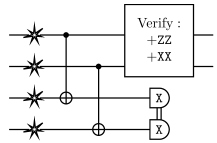

In [2]:
good_bell_state = S"XX
                    ZZ"
initial_state = MixedDestabilizer(good_bell_state⊗good_bell_state)

g1 = sCNOT(1,3) # CNOT between qubit 1 and qubit 3 (both with Alice)
g2 = sCNOT(2,4) # CNOT between qubit 2 and qubit 4 (both with Bob)
m = BellMeasurement([sMX(3),sMX(4)]) # Bell measurement on qubit 3 and 4
v = VerifyOp(good_bell_state,[1,2]) # Verify that qubit 1 and 2 indeed form a good Bell pair
epsilon = 0.1 # The error rate
n = NoiseOpAll(UnbiasedUncorrelatedNoise(epsilon))

# This circuit performs a depolarization at rate `epsilon` to all qubits,
# then bilater CNOT operations
# then a Bell measurement
# followed by checking whether the final result indeed corresponds to the correct Bell pair.
circuit = [n,g1,g2,m,v] # Drawing the circuit out can be a bit slow as it uses LaTeX

## If you want to use `Symbolics`

In [3]:
using Symbolics
@variables e
unity = one(e);

In [4]:
good_bell_state = S"XX
                    ZZ"
initial_state = MixedDestabilizer(good_bell_state⊗good_bell_state)

g1 = sCNOT(1,3) # CNOT between qubit 1 and qubit 3 (both with Alice)
g2 = sCNOT(2,4) # CNOT between qubit 2 and qubit 4 (both with Bob)
m = BellMeasurement([sMX(3),sMX(4)]) # Bell measurement on qubit 3 and 4
v = VerifyOp(good_bell_state,[1,2]) # Verify that qubit 1 and 2 indeed form a good Bell pair
epsilon = e # The error rate
n = NoiseOpAll(UnbiasedUncorrelatedNoise(epsilon))

# This circuit performs a depolarization at rate `epsilon` to all qubits,
# then bilater CNOT operations
# then a Bell measurement
# followed by checking whether the final result indeed corresponds to the correct Bell pair.
circuit = [n,g1,g2,m,v]

pe_symbolic = petrajectories(initial_state, circuit, branch_weight=unity) # perturbative expansion

Dict{QuantumClifford.Experimental.NoisyCircuits.CircuitStatus, Num} with 3 entries:
  failure:CircuitStatus(3)       => 4e*((1 - 3e)^3)
  false_success:CircuitStatus(2) => 6e*((1 - 3e)^3)
  true_success:CircuitStatus(1)  => (1 - 3e)^4 + 2e*((1 - 3e)^3)

In [5]:
@benchmark petrajectories(initial_state, circuit, branch_weight=unity)

BenchmarkTools.Trial: 3621 samples with 1 evaluation.
 Range (min … max):  1.059 ms …  24.199 ms  ┊ GC (min … max): 0.00% … 92.42%
 Time  (median):     1.251 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.373 ms ± 904.878 μs  ┊ GC (mean ± σ):  2.71% ±  4.04%

     █▄█▄█▃▃▁                                                  
  ▂▅██████████▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁ ▃
  1.06 ms         Histogram: frequency by time        2.51 ms <

 Memory estimate: 352.16 KiB, allocs estimate: 8202.

In [6]:
# How to evaluate numerically
substitute(pe_symbolic[true_success_stat], Dict(e=>0.1))

0.3086999999999999

## If you want to use `AbstractAlgebra`

In [7]:
using AbstractAlgebra # Consider using Nemo.jl which can be much faster while having the same interfaces
R, (e,) = PolynomialRing(RealField, ["e"])
unity = R(1);

In [8]:
good_bell_state = S"XX
                    ZZ"
initial_state = MixedDestabilizer(good_bell_state⊗good_bell_state)

g1 = sCNOT(1,3) # CNOT between qubit 1 and qubit 3 (both with Alice)
g2 = sCNOT(2,4) # CNOT between qubit 2 and qubit 4 (both with Bob)
m = BellMeasurement([sMX(3),sMX(4)]) # Bell measurement on qubit 3 and 4
v = VerifyOp(good_bell_state,[1,2]) # Verify that qubit 1 and 2 indeed form a good Bell pair
epsilon = e # The error rate
n = NoiseOpAll(UnbiasedUncorrelatedNoise(epsilon))

# This circuit performs a depolarization at rate `epsilon` to all qubits,
# then bilater CNOT operations
# then a Bell measurement
# followed by checking whether the final result indeed corresponds to the correct Bell pair.
circuit = [n,g1,g2,m,v]

pe_symbolic = petrajectories(initial_state, circuit, branch_weight=unity) # perturbative expansion

Dict{QuantumClifford.Experimental.NoisyCircuits.CircuitStatus, AbstractAlgebra.Generic.MPoly{BigFloat}} with 3 entries:
  failure:CircuitStatus(3)       => -108.0*e^4 + 108.0*e^3 - 36.0*e^2 + 4.0*e
  false_success:CircuitStatus(2) => -162.0*e^4 + 162.0*e^3 - 54.0*e^2 + 6.0*e
  true_success:CircuitStatus(1)  => 27.0*e^4 - 54.0*e^3 + 36.0*e^2 - 10.0*e + 1

In [9]:
@benchmark petrajectories(initial_state, circuit, branch_weight=unity)

BenchmarkTools.Trial: 7012 samples with 1 evaluation.
 Range (min … max):  580.274 μs …  24.745 ms  ┊ GC (min … max): 0.00% … 96.18%
 Time  (median):     638.222 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   707.947 μs ± 980.471 μs  ┊ GC (mean ± σ):  6.32% ±  4.44%

    █▂▅▂                                                         
  ▂▅█████▇▆▇▆▅▅▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂ ▃
  580 μs           Histogram: frequency by time         1.19 ms <

 Memory estimate: 360.54 KiB, allocs estimate: 7200.

In [10]:
# How to evaluate numerically
pe_symbolic[true_success_stat](0.1)

0.30870000000000000209472196532889398667975910939276218414306640625

## If you want to use `SymPy`

In [11]:
using SymPy
e = Sym("e")
unity = Sym(1);

In [12]:
good_bell_state = S"XX
                    ZZ"
canonicalize_rref!(good_bell_state)
initial_state = MixedDestabilizer(good_bell_state⊗good_bell_state)

g1 = sCNOT(1,3) # CNOT between qubit 1 and qubit 3 (both with Alice)
g2 = sCNOT(2,4) # CNOT between qubit 2 and qubit 4 (both with Bob)
m = BellMeasurement([sMX(3),sMX(4)]) # Bell measurement on qubit 3 and 4
v = VerifyOp(good_bell_state,[1,2]) # Verify that qubit 1 and 2 indeed form a good Bell pair
epsilon = e # The error rate
n = NoiseOpAll(UnbiasedUncorrelatedNoise(epsilon))

# This circuit performs a depolarization at rate `epsilon` to all qubits,
# then bilater CNOT operations
# then a Bell measurement
# followed by checking whether the final result indeed corresponds to the correct Bell pair.
circuit = [n,g1,g2,m,v]

pe_symbolic = petrajectories(initial_state, circuit, branch_weight=unity) # perturbative expansion

Dict{QuantumClifford.Experimental.NoisyCircuits.CircuitStatus, Sym} with 3 entries:
  failure:CircuitStatus(3)       => 4.0*e*(1 - 3*e)^3
  false_success:CircuitStatus(2) => 6.0*e*(1 - 3*e)^3
  true_success:CircuitStatus(1)  => 2.0*e*(1 - 3*e)^3 + 1.0*(1 - 3*e)^4

In [13]:
@benchmark petrajectories(initial_state, circuit, branch_weight=unity)

BenchmarkTools.Trial: 901 samples with 1 evaluation.
 Range (min … max):  4.720 ms … 150.118 ms  ┊ GC (min … max): 0.00% … 51.46%
 Time  (median):     5.201 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.540 ms ±   5.012 ms  ┊ GC (mean ± σ):  1.55% ±  1.71%

           █▆                                                  
  ▂▂▅▅▇▆█▇▇████▇██▇█▆▆▅▄▄▅▄▃▃▄▃▃▃▃▄▃▃▂▂▃▃▃▃▂▂▂▁▂▂▁▂▂▂▁▂▂▁▁▁▁▂ ▃
  4.72 ms         Histogram: frequency by time        6.92 ms <

 Memory estimate: 226.44 KiB, allocs estimate: 5574.

In [14]:
# How to evaluate numerically
pe_symbolic[true_success_stat].subs(e,0.1)

0.308700000000000

## Comparison to numeric result

In [15]:
true_success_symbolic = pe_symbolic[true_success_stat]

               3                4
2.0⋅e⋅(1 - 3⋅e)  + 1.0⋅(1 - 3⋅e) 

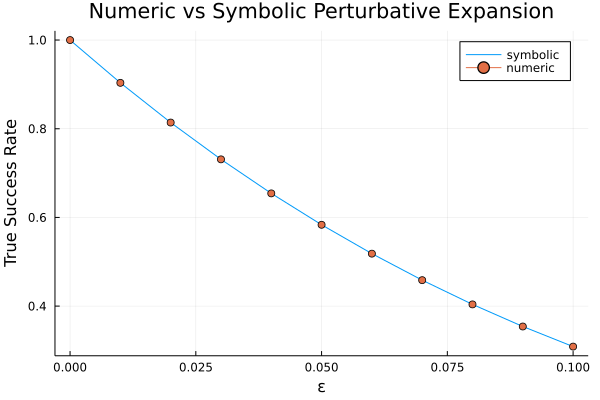

In [16]:
es_num = 0:0.01:0.1
symbolic_evaluations = [Float64(true_success_symbolic.subs(e,e_num)) for e_num in es_num]

numeric_evaluations = []
for epsilon in es_num
    n = NoiseOpAll(UnbiasedUncorrelatedNoise(epsilon))
    circuit = [n,g1,g2,m,v]
    pe_symbolic = petrajectories(initial_state, circuit)
    push!(numeric_evaluations, pe_symbolic[true_success_stat])
end

plot(es_num, symbolic_evaluations, label="symbolic")
plot!(es_num, numeric_evaluations, line=false, marker=true, label="numeric")
plot!(xlabel="ε", ylabel="True Success Rate", title="Numeric vs Symbolic Perturbative Expansion")

## Reproducibility information

In [17]:
versioninfo()
using Pkg
Pkg.status("QuantumClifford")
Pkg.status("Symbolics")
Pkg.status("AbstractAlgebra")
Pkg.status("SymPy")

Julia Version 1.9.0-DEV.573
Commit 35aaf68470 (2022-05-13 09:54 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 4 on 8 virtual cores
Environment:
  JULIA_NUM_THREADS = 4
Status `~/Documents/ScratchSpace/clifford/Project.toml`
  [0525e862] QuantumClifford v0.5.0-dev `QuantumClifford`
Status `~/Documents/ScratchSpace/clifford/Project.toml`
  [0c5d862f] Symbolics v4.5.1
Status `~/Documents/ScratchSpace/clifford/Project.toml`
⌅ [c3fe647b] AbstractAlgebra v0.25.3
Info Packages marked with ⌅ have new versions available but cannot be upgraded. To see why use `status --outdated`
Status `~/Documents/ScratchSpace/clifford/Project.toml`
  [24249f21] SymPy v1.1.6
